## Multi-class Classification & Neural Networks - Feedforward Propagation

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import os
import scipy.optimize as opt
import scipy.io as from_octave # used to implement mat file type
import random as rd
import ex3_func as fn
from scipy.misc import toimage # used to convert matrix to image
import matplotlib.cm as cm # used to display images in a specific colormap
# Update the matplotlib configuration parameters: 
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'ubuntu'})
% matplotlib inline

#### Multi-class Classification

For  this  exercise,  logistic  regression  and  neural  networks  are employed to recognize  handwritten  digits  (from  0  to  9). Automated  handwritten  digit recognition is widely used today - from recognizing zip codes (postal codes) on  mail  envelopes  to  recognizing  amounts  written  on  bank  checks.

#### Convert .mat file and prepare data

In [2]:
directory = os.getcwd() + '/ex3data1.mat'
mat = from_octave.loadmat(directory)
y = np.array(mat['y'],dtype='float')
X = np.array(mat['X'],dtype='float')

# setup sime parameters used for the specific excersise
input_layer_size  = 400  # 20x20 Input Images of Digits
num_labels = 10          # 10 labels, from 1 to 10 (10 represents 0)
m,n = X.shape 

y.shape, X.shape , np.unique(y)

((5000, 1),
 (5000, 400),
 array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]))

#### Visualizing the data

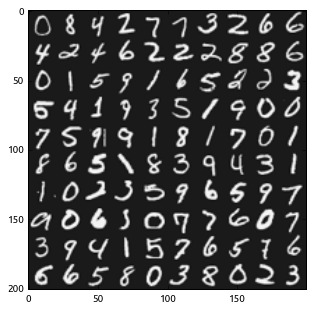

In [3]:
fig = plt.figure(figsize=(5,5))
# initialize an array to store data
data_img = np.array(np.ones(200)).reshape(1,200)
m = X.shape[0]
for i in range(10):
    sel = rd.sample(range(1, m), 10) # randomly select 10 data points
    data1 = X[sel].reshape(200,20).T 
    data_img = np.concatenate([data_img,data1])
img = toimage(data_img) # from scipy.misc library
plt.imshow(img,cmap = cm.Greys_r);

#### Cost Function , Gradient and One-vs-all Classification

In [4]:
# add bias terms
X_ = np.insert(X, 0, 1,axis=1)
m,n = X_.shape

# initialize theta valus
theta = np.zeros(n)

lambda_ = 0.5

thetas = []
for i in range(1,num_labels+1):
    print "Optimizing for handwritten number {}...".format(i)
    result = opt.fmin_tnc(func=fn.lrCostFunction, 
                           x0=theta, 
                           fprime=fn.gradient, 
                           args=(X_, (y==i).astype(int), lambda_))

    all_theta = result[0]
    thetas.append(all_theta)
print 'finished'

Optimizing for handwritten number 1...
Optimizing for handwritten number 2...
Optimizing for handwritten number 3...
Optimizing for handwritten number 4...
Optimizing for handwritten number 5...
Optimizing for handwritten number 6...
Optimizing for handwritten number 7...
Optimizing for handwritten number 8...
Optimizing for handwritten number 9...
Optimizing for handwritten number 10...
finished


In [5]:
nteta = np.array(thetas)
X_.shape,nteta.shape
accuracy = np.sum((np.argmax(fn.sigmoid(X_.dot(nteta.T)),axis=1)+1).reshape(y.size,1)==y)/float(y.size)
print 'Training Set Accuracy: %{}'.format(accuracy*100)

Training Set Accuracy: %95.02


## Neural Networks - Feedforward Propagation

In this part of the exercise, a neural network is employed to recognize handwritten digits using the same training set as before. The neural network will be able to represent complex models that form non-linear hypotheses. Parameters from a neural network that we have already trained is used for this excersise.

#### Convert .mat file and prepare data

In [6]:
# Load training data
directory = os.getcwd() + '/ex3data1.mat'
data = from_octave.loadmat(directory)
y = np.array(data['y'],dtype='float')
X = np.array(data['X'],dtype='float')

# setup sime parameters used for the specific excersise
input_layer_size  = 400  # 20x20 Input Images of Digits
num_labels = 10          # 10 labels, from 1 to 10 (for octave) 10 is actually 0
m,n = X.shape 

y.shape, X.shape , np.unique(y)

((5000, 1),
 (5000, 400),
 array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]))

In [7]:
# load trained weights
directory = os.getcwd() + '/ex3weights.mat'
theta_mat = from_octave.loadmat(directory)
theta1 =  theta_mat["Theta1"]
theta2 =  theta_mat["Theta2"]

#### Feedforward Propagation and Prediction

In [8]:
# add the bias terms
X_ = np.insert(X, 0, 1,axis=1)
print X_.shape ,theta1.shape ,theta2.shape

pred_ = fn.predict(theta1,theta2,X_)
accuracy = (np.sum(pred_ == y)/float(m))*100

print '\nTraining Set Accuracy : {}'.format(accuracy)

(5000, 401) (25, 401) (10, 26)

Training Set Accuracy : 97.52


#### Randomly permute examples

Displaying Example Image of 6.0
and the neural networks prediction is 6.0


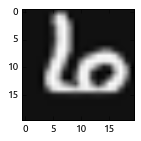

In [9]:
fn.permuter(X,y,pred_)